This script shows how to make projections and slices, how to same a 'ArepoImage' and how to convert the Arepo data from comoving code units to physical values in CGS.

In [1]:
from paicos import arepo_snap
import numpy as np
simfolder12 = '/llust21/cosmo-plasm/zoom-simulations/halo_0003/adiabatic-mhd/zoom12/'
simfolder = '/llust21/cosmo-plasm/zoom-simulations/halo_0003/adiabatic-mhd/zoom12/'
snap = arepo_snap.snapshot(simfolder12 + 'output', 130)
center = snap.Cat.Group['GroupPos'][0]

snap = arepo_snap.snapshot(simfolder + 'output', 130)
xc, yc, zc = center
snap.load_data(0, 'Coordinates')
pos = snap.P['0_Coordinates']
snap.get_volumes()
snap.load_data(0, 'Density')

In [2]:
%%bash
cd /llust21/berlok/paicos
make clean
make

python setup.py clean
running clean
removing 'build/temp.linux-x86_64-cpython-310' (and everything under it)
rm -rf paicos/cython/*.{c,so,html}
rm -rf paicos/__pycache__ paicos/cython/__pycache__
python setup.py build_ext --inplace
Compiling paicos/cython/cyoctree.pyx because it changed.
Compiling paicos/cython/cython_functions.pyx because it changed.
[1/2] Cythonizing paicos/cython/cyoctree.pyx
[2/2] Cythonizing paicos/cython/cython_functions.pyx
running build_ext
building 'paicos.cython.cyoctree' extension
creating build/temp.linux-x86_64-cpython-310
creating build/temp.linux-x86_64-cpython-310/paicos
creating build/temp.linux-x86_64-cpython-310/paicos/cython
gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -fPIC -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -I/usr/local/lib/python3.10/site-packages/numpy/core/include -I/usr/local/include/python3.10 -c paicos/cython/cyoctree.c -o build/temp.linux-x86_64-cpython-310/paicos/cython/cyoctree.o -fopenmp
gcc -pthr

In [2]:
from paicos import NestedProjector as Projector
# from paicos import Projector
widths = [26000, 13000, 10000]
p = Projector(snap, center, widths, 'z', npix=2048, numthreads=40)

In [5]:
Masses = p.project_variable('Masses')
Volumes = p.project_variable('Volumes')

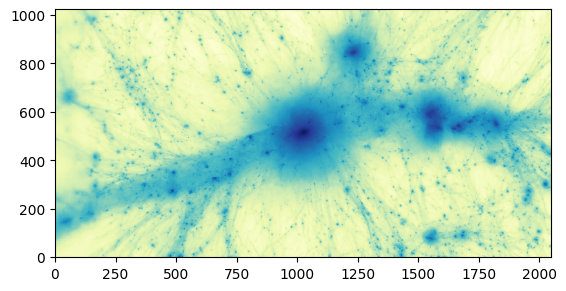

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.rc('image', origin='lower', cmap='RdBu_r', interpolation='None')
plt.imshow(Masses/Volumes, cmap='YlGnBu', norm=LogNorm())
# plt.savefig('Z24_snap130_wide_projection_notnested.pdf', dpi=2000, bbox_inches='tight')

In [9]:
from paicos import Slicer
widths = [26000, 13000, 0]
s = Slicer(snap, center, widths, 'z', npix=2048, numthreads=32)

<Figure size 640x480 with 0 Axes>

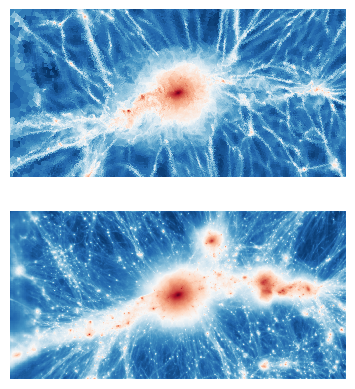

In [11]:
plt.figure(1)
plt.clf()
fix, axes = plt.subplots(nrows=2)
axes[0].imshow(s.get_image(snap.P['0_Density']), norm=LogNorm())
axes[1].imshow(Masses/Volume, norm=LogNorm())
for ii in range(2):
    axes[ii].set_axis_off()
plt.savefig('halo3_Z12_slice_projec_comparison.pdf', dpi=2000, bbox_inches='tight')

In [18]:
snap.load_data(0, 'EnergyDissipation')

In [17]:
snap.info(0)

keys for PartType0 are
['AllowRefinement', 'CenterOfMass', 'Coordinates', 'Density', 'EnergyDissipation', 'HighResGasMass', 'InternalEnergy', 'Machnumber', 'MagneticField', 'MagneticFieldDivergence', 'MagneticFieldDivergenceAlternative', 'Masses', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities', 'VelocityGradient']


['AllowRefinement',
 'CenterOfMass',
 'Coordinates',
 'Density',
 'EnergyDissipation',
 'HighResGasMass',
 'InternalEnergy',
 'Machnumber',
 'MagneticField',
 'MagneticFieldDivergence',
 'MagneticFieldDivergenceAlternative',
 'Masses',
 'ParticleIDs',
 'Potential',
 'SubfindDMDensity',
 'SubfindDensity',
 'SubfindHsml',
 'SubfindVelDisp',
 'Velocities',
 'VelocityGradient']

In [22]:
snap.load_data(0, 'HighResGasMass')

In [15]:
def get_index(ii, jj):
    return ii*3 + jj
gradV = snap.P['0_VelocityGradient']
vor_x = gradV[:, get_index(2, 1)] - gradV[:, get_index(1, 2)]
vor_y = gradV[:, get_index(0, 2)] - gradV[:, get_index(2, 0)]
vor_z = gradV[:, get_index(1, 0)] - gradV[:, get_index(0, 1)]
# The vorticity vector
# vorticity = np.stack([vor_x, vor_y, vor_z], axis=1)

enstrophy = 0.5 * (vor_x**2 + vor_y**2 + vor_z**2)

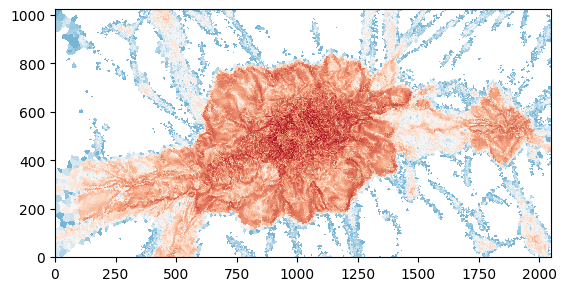

In [55]:
plt.imshow(s.get_image(enstrophy), norm=LogNorm())

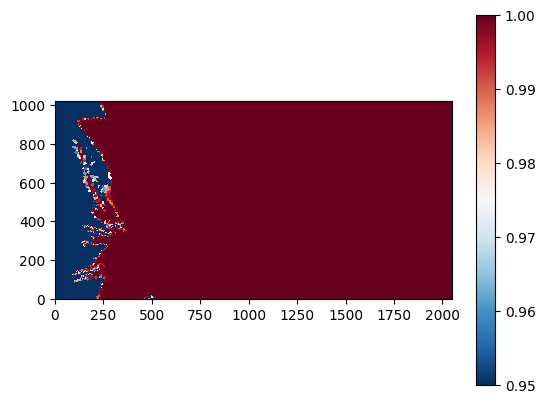

In [28]:
plt.imshow(s.get_image(snap.P['0_HighResGasMass']/snap.P['0_Masses']), vmin=0.95, vmax=1)
plt.colorbar()

In [29]:
snap

In [30]:
Masses

array([[0.00035778, 0.00035778, 0.00039833, ..., 0.00080725, 0.0007547 ,
        0.00066312],
       [0.00035778, 0.00035778, 0.00039833, ..., 0.0009715 , 0.00089831,
        0.00076799],
       [0.00038832, 0.00038832, 0.00043784, ..., 0.00109411, 0.00099493,
        0.00085801],
       ...,
       [0.00028202, 0.00028202, 0.00028202, ..., 0.00053163, 0.00043787,
        0.00041619],
       [0.00028202, 0.00028202, 0.00028202, ..., 0.00044842, 0.00037004,
        0.00034693],
       [0.00028202, 0.00028202, 0.00028202, ..., 0.00042786, 0.00034782,
        0.00032671]])

In [32]:
rho = s.get_image(snap.P['0_Density'])

In [33]:
from paicos import ArepoImage

In [34]:
image_file = ArepoImage('./test_image.hdf5', snap.first_snapfile_name,
                            center, widths, 'z')

In [35]:
image_file.save_image('Density', s.get_image(snap.P['0_Density']))

In [37]:
image_file.finalize()

In [41]:
import h5py
f = h5py.File('test_image.hdf5', 'r')

In [42]:
list(f.keys())

['Config', 'Density', 'Header', 'Parameters', 'image_info']

In [45]:
f['image_info'].attrs.keys()

<KeysViewHDF5 ['center', 'direction', 'extent', 'widths']>

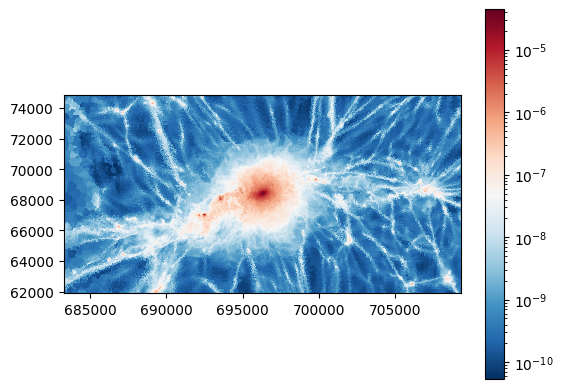

In [48]:
plt.imshow(f['Density'], extent=f['image_info'].attrs['extent'], norm=LogNorm())
plt.colorbar()

In [49]:
from paicos import ArepoConverter
converter = ArepoConverter('test_image.hdf5')

In [52]:
rho = converter.to_physical_and_give_units('Density', f['Density'][...])

In [53]:
rho

<Quantity [[1.1896853e-30, 1.1896853e-30, 1.1896853e-30, ...,
            1.9651017e-30, 1.9651017e-30, 1.9651017e-30],
           [1.1896853e-30, 1.1896853e-30, 1.1896853e-30, ...,
            1.9651017e-30, 1.9651017e-30, 1.9651017e-30],
           [1.1896853e-30, 1.1896853e-30, 1.1896853e-30, ...,
            1.9651017e-30, 1.9651017e-30, 1.9651017e-30],
           ...,
           [1.1451707e-30, 1.1451707e-30, 1.1451707e-30, ...,
            7.4637055e-31, 7.4637055e-31, 7.4637055e-31],
           [1.1451707e-30, 1.1451707e-30, 1.1451707e-30, ...,
            7.4637055e-31, 7.4637055e-31, 7.4637055e-31],
           [1.1451707e-30, 1.1451707e-30, 1.1451707e-30, ...,
            2.0625613e-30, 2.0625613e-30, 2.0625613e-30]] g / cm3>